In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
# checking the new values

In [6]:
for i in df.columns:
    print(i,'.....',df[i].unique(),'.....',df[i].nunique())

Airline ..... ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] ..... 12
Date_of_Journey ..... ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019'] ..... 44
Source ..... ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] ..... 5
Destination ..... ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad'] ..... 6
Route ..... ['BLR → DEL' '

In [7]:
for i in df.columns:
    print(i,'.....',df[i].unique,'.....',df[i].nunique)

Airline ..... <bound method Series.unique of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object> ..... <bound method IndexOpsMixin.nunique of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object>
Date_of_Journey ..... <bound method Series.unique of 0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object> ..... <bound method IndexOpsMixi

In [8]:
# cleaning

In [9]:
df.isnull().sum().to_frame().rename(columns={0:'missing value count'}).T

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
missing value count,0,0,0,0,1,0,0,0,1,0,0


In [10]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [11]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [13]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [16]:
20*60+50

1250

In [17]:
df['Duration'].replace('h',60)

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [18]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)    

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [20]:
# feature engineering

In [21]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

C:\Users\Madhu\AppData\Local\Temp\ipykernel_11128\1511355351.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-17 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-17 05:50:00,2023-09-17 13:15:00,445,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-17 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-17 18:05:00,2023-09-17 23:30:00,325,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-17 16:50:00,2023-09-17 21:35:00,285,1 stop,No info,13302


In [23]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [24]:
df.dtypes.to_frame().rename(columns={0:'dtypes'}).T

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
dtypes,object,datetime64[ns],object,object,object,datetime64[ns],datetime64[ns],int64,object,object,int64


In [25]:
#extracting day
df['day_of_journey']=df['Date_of_Journey'].dt.day

# extracting months
df['month_of_journey']=df['Date_of_Journey'].dt.month

# extracting departure hours
df['Dep_hour']=df['Dep_Time'].dt.hour

# extracting departure minutes
df['Dep_min']=df['Dep_Time'].dt.minute

# extracting arrival hours
df['arrival_hour']=df['Arrival_Time'].dt.hour

# extracting arrival minutes
df['arrival_min']=df['Arrival_Time'].dt.minute

In [26]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)
df.shape

(10683, 14)

In [27]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [28]:
df['Airline']=df['Airline'].str.replace('Vistara Premium economy','Vistara')
df['Airline']=df['Airline'].str.replace('Jet Airways Business','Jet Airways')
df['Airline']=df['Airline'].str.replace('Multiple carriers Premium economy','Multiple carriers')

In [29]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [30]:
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

In [31]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [32]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [34]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [35]:
x=df[(df["Airline"]=="Air India")&(df["Source"]=="Mumbai")&(df["Destination"]=="Hyderabad")&(df["Total_Stops"]==2)]

In [36]:
x["Duration"].mean()

1070.6521739130435

In [37]:
df.loc[6474,"Duration"]=round(x["Duration"].mean(),2)
df.iloc[6474]

Airline                         Air India
Source                             Mumbai
Destination                     Hyderabad
Route               BOM → GOI → PNQ → HYD
Duration                          1070.65
Total_Stops                             2
Additional_Info                   No info
Price                               17327
day_of_journey                          3
month_of_journey                        6
Dep_hour                               16
Dep_min                                50
arrival_hour                           16
arrival_min                            55
Name: 6474, dtype: object

In [38]:
df.loc[6474,"arrival_hour"]=17
df.loc[6474,"arrival_min"]=50
df.iloc[6474]

Airline                         Air India
Source                             Mumbai
Destination                     Hyderabad
Route               BOM → GOI → PNQ → HYD
Duration                          1070.65
Total_Stops                             2
Additional_Info                   No info
Price                               17327
day_of_journey                          3
month_of_journey                        6
Dep_hour                               16
Dep_min                                50
arrival_hour                           17
arrival_min                            50
Name: 6474, dtype: object

C:\Users\Madhu\AppData\Local\Temp\ipykernel_11128\106281001.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

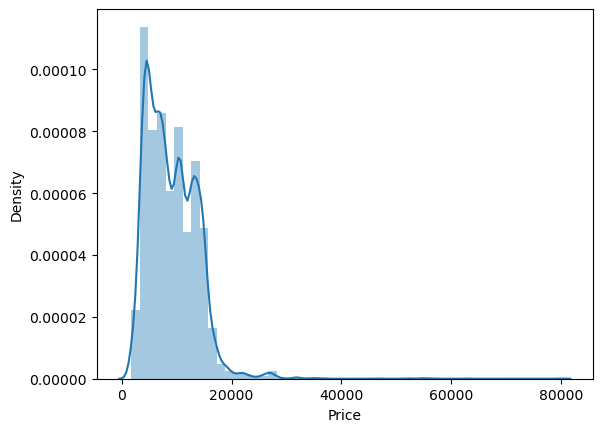

In [39]:
import seaborn as sns
sns.distplot(df["Price"])

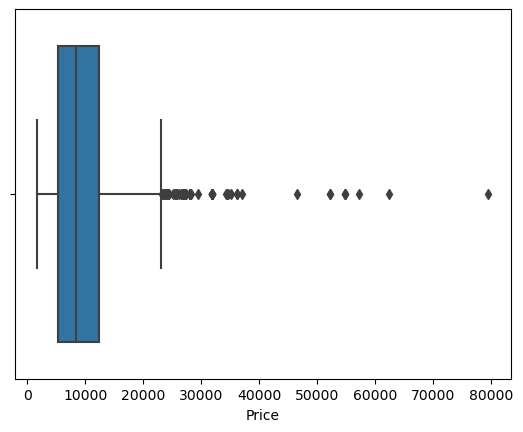

In [40]:
sns.boxplot(x="Price",data=df);

In [41]:
df["Price"].agg(["max","min","mean"])

max     79512.000000
min      1759.000000
mean     9087.064121
Name: Price, dtype: float64

In [42]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170.0,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445.0,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140.0,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325.0,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285.0,1,No info,13302,3,1,16,50,21,35


In [43]:
x_mean=df[df['Price']>45000]

In [44]:
len(df[df["Price"]<x_mean])
len(df[df["Price"]>=x_mean])

C:\Users\Madhu\AppData\Local\Temp\ipykernel_11128\2843023136.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  len(df[df["Price"]<x_mean])
C:\Users\Madhu\AppData\Local\Temp\ipykernel_11128\2843023136.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  len(df[df["Price"]>=x_mean])


10683

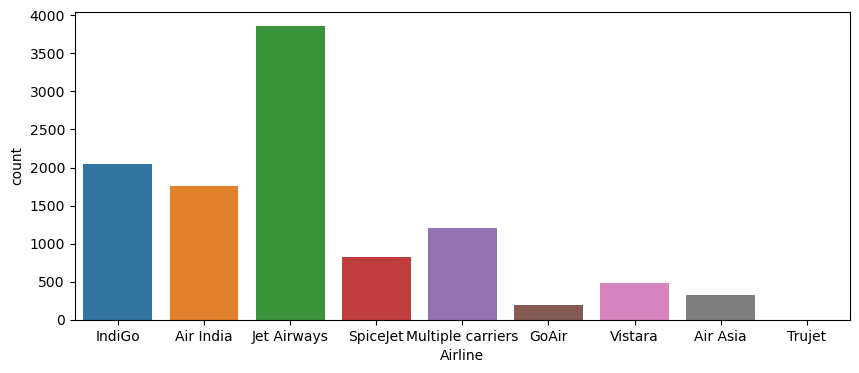

In [45]:
df['Airline'].value_counts()
plt.figure(figsize=(10,4))
sns.countplot(x="Airline",data=df);

In [46]:
df.groupby('Airline')['Price'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
Airline,
Jet Airways,11716.631128
Multiple carriers,10908.228288
Air India,9611.210616
Vistara,7803.605809
GoAir,5861.056701
IndiGo,5673.682903
Air Asia,5590.260188
SpiceJet,4338.284841
Trujet,4140.000000


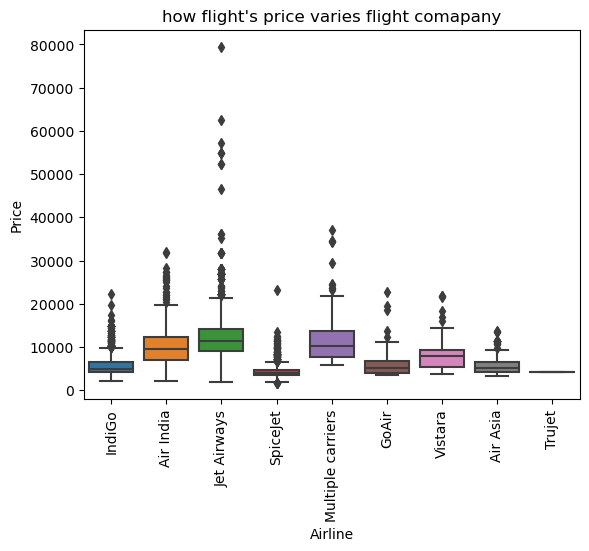

In [47]:
sns.boxplot(x="Airline",y="Price",data=df);
plt.xticks(rotation=90)
plt.title("how flight's price varies flight comapany");

In [48]:
df.groupby('Airline')['Price'].agg(['min','max'])

,min,max
Airline,,
Air Asia,3383,13774
Air India,2050,31945
GoAir,3398,22794
IndiGo,2227,22153
Jet Airways,1840,79512
Multiple carriers,5797,36983
SpiceJet,1759,23267
Trujet,4140,4140
Vistara,3687,21730


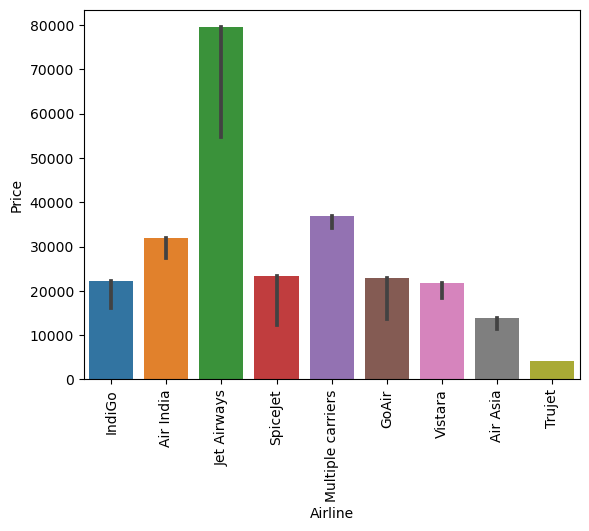

In [49]:
sns.barplot(x="Airline",y="Price",estimator=max,data=df);
plt.xticks(rotation=90);

In [50]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170.0,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445.0,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140.0,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325.0,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285.0,1,No info,13302,3,1,16,50,21,35


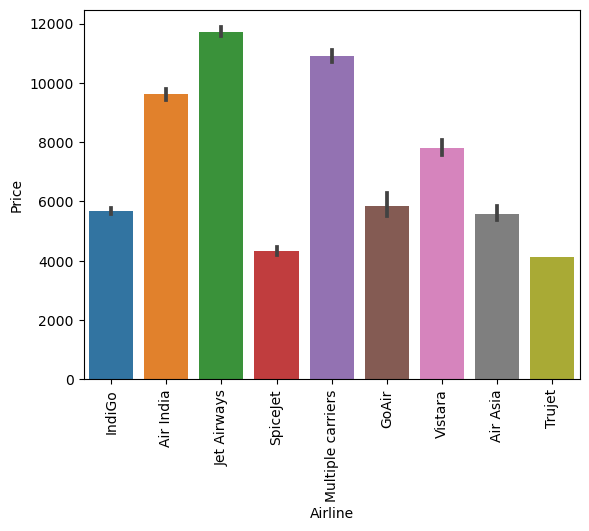

In [51]:
sns.barplot(x="Airline",y="Price",data=df);
plt.xticks(rotation=90);

In [52]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

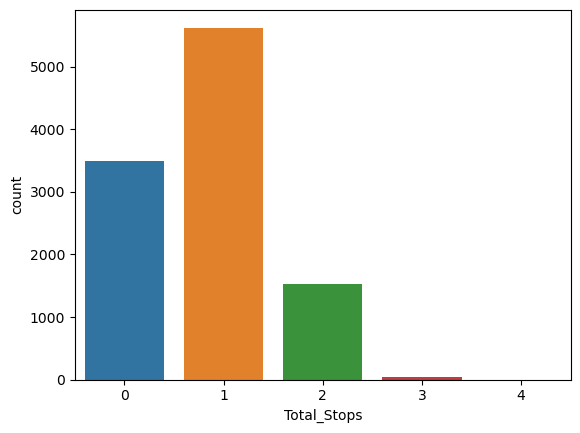

In [53]:
sns.countplot(x='Total_Stops',data=df);

In [54]:
df[df["Total_Stops"]==4]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
9182,Air India,Banglore,Delhi,BLR → CCU → BBI → HYD → VGA → DEL,1770.0,4,Change airports,17686,3,1,5,50,11,20


In [55]:
df.groupby(["Total_Stops"])["Airline"].value_counts()

Total_Stops  Airline          
0            IndiGo               1241
             SpiceJet              670
             Jet Airways           623
             Air India             417
             Vistara               267
             Air Asia              181
             GoAir                  92
1            Jet Airways          2539
             Multiple carriers    1158
             IndiGo                793
             Air India             541
             Vistara               215
             SpiceJet              148
             Air Asia              129
             GoAir                 102
             Trujet                  1
2            Air India             756
             Jet Airways           693
             Multiple carriers      43
             IndiGo                 19
             Air Asia                9
3            Air India              37
             Multiple carriers       8
4            Air India               1
Name: Airline, dtype: int64

In [56]:
df.groupby('Airline')['Total_Stops'].agg(['min','max'])

,min,max
Airline,,
Air Asia,0,2
Air India,0,4
GoAir,0,1
IndiGo,0,2
Jet Airways,0,2
Multiple carriers,1,3
SpiceJet,0,1
Trujet,1,1
Vistara,0,1


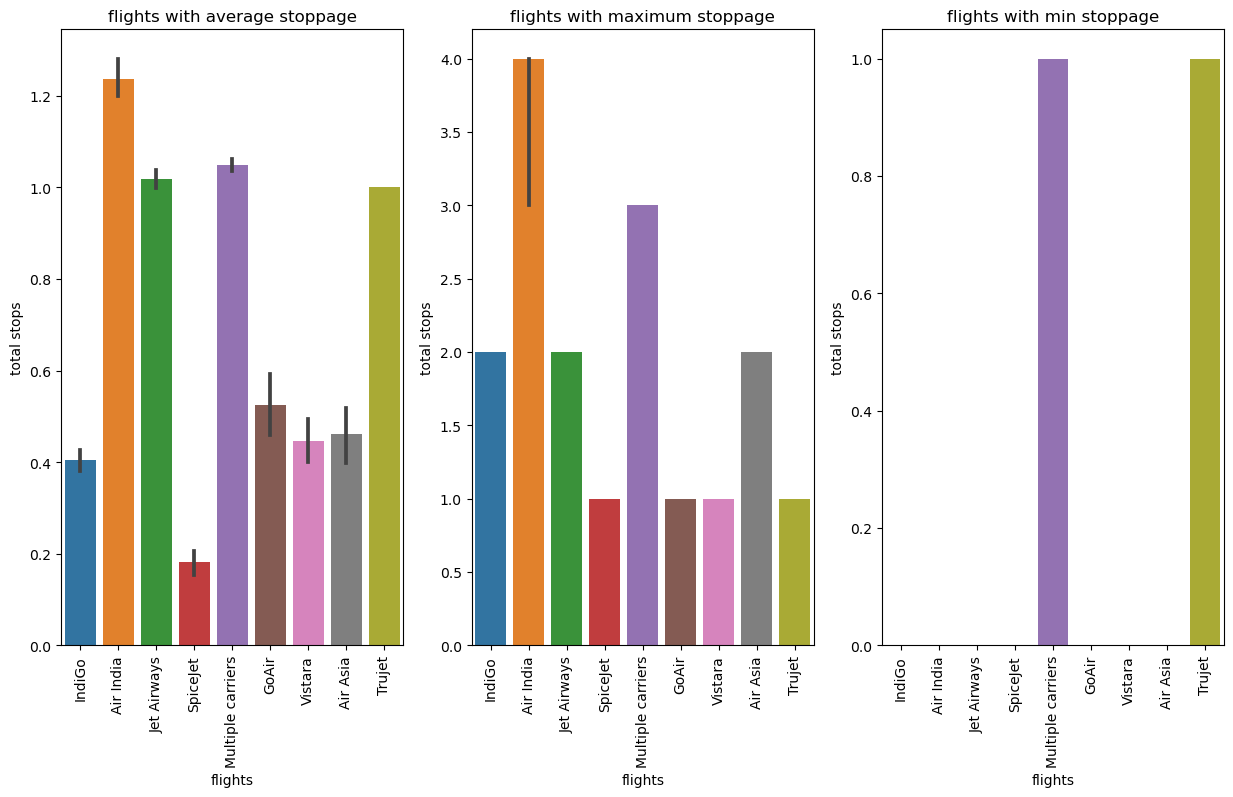

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.barplot(x="Airline",y="Total_Stops",data=df)
plt.title("flights with average stoppage")
plt.xlabel("flights")
plt.ylabel("total stops")
plt.xticks(rotation=90)


plt.subplot(1,3,2)
sns.barplot(x="Airline",y="Total_Stops",data=df,estimator=max)
plt.title("flights with maximum stoppage")
plt.xlabel("flights")
plt.ylabel("total stops")
plt.xticks(rotation=90)


plt.subplot(1,3,3)
sns.barplot(x="Airline",y="Total_Stops",data=df,estimator=min)
plt.title("flights with min stoppage")
plt.xlabel("flights")
plt.ylabel("total stops")
plt.xticks(rotation=90);

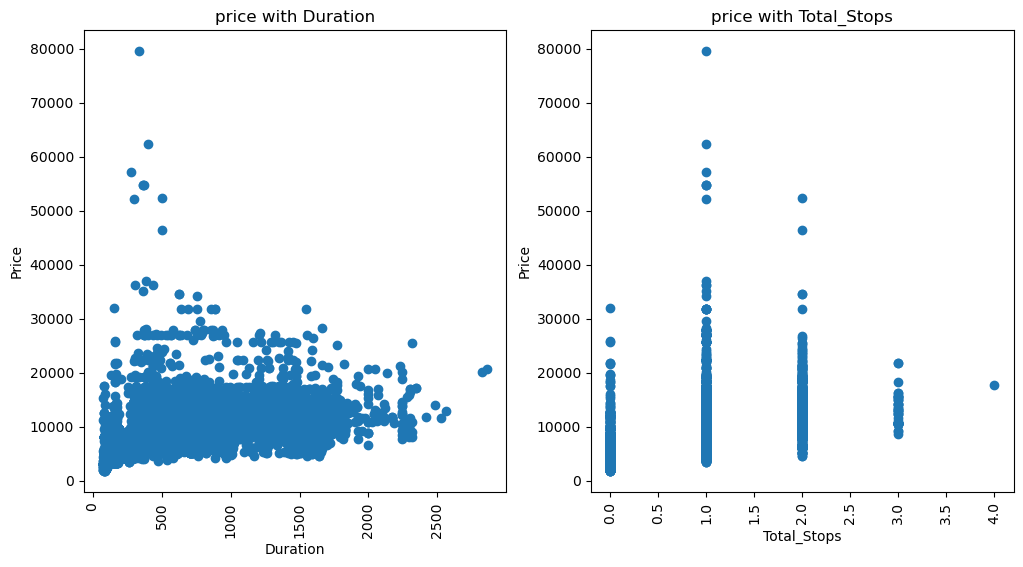

In [60]:
numeric=["Duration","Total_Stops"]
pos=1
plt.figure(figsize=(12,6))
for i in numeric:
    plt.subplot(1,2,pos)
    plt.scatter(df[i],df["Price"])
    plt.title(f"price with {i}")
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.xticks(rotation=90)
    pos=pos+1

In [61]:
df.groupby(["Source","Destination"])["Airline"].value_counts()

Source    Destination  Airline          
Banglore  Delhi        Jet Airways           792
                       IndiGo                523
                       Air India             332
                       Vistara               187
                       SpiceJet              181
                       GoAir                  93
                       Air Asia               89
Chennai   Kolkata      IndiGo                184
                       SpiceJet              128
                       Vistara                44
                       Air India              25
Delhi     Cochin       Jet Airways          1588
                       Multiple carriers    1209
                       Air India             747
                       IndiGo                705
                       SpiceJet               87
                       Air Asia               80
                       GoAir                  76
                       Vistara                45
Kolkata   Banglore     Jet A

In [62]:
k=df.groupby(["Source","Destination","Airline"])["Price"].agg(["mean","max","min"])
k.reset_index(inplace=True)
k

,Source,Destination,Airline,mean,max,min
0,Banglore,Delhi,Air Asia,4574.280899,10873,3383
1,Banglore,Delhi,Air India,9238.198795,31783,3758
2,Banglore,Delhi,GoAir,4948.881720,18558,3398
3,Banglore,Delhi,IndiGo,5274.112811,22153,3359
4,Banglore,Delhi,Jet Airways,11283.462121,79512,3359
5,Banglore,Delhi,SpiceJet,4550.292818,23267,3257
6,Banglore,Delhi,Vistara,6211.037433,21730,4353
7,Chennai,Kolkata,Air India,5895.640000,19630,3145
8,Chennai,Kolkata,IndiGo,4538.766304,8580,3384
9,Chennai,Kolkata,SpiceJet,3993.523438,7718,3332


In [63]:
k.set_index(["Source","Destination"])

Airline          mean    max    min
Source   Destination                                               
Banglore Delhi                 Air Asia   4574.280899  10873   3383
         Delhi                Air India   9238.198795  31783   3758
         Delhi                    GoAir   4948.881720  18558   3398
         Delhi                   IndiGo   5274.112811  22153   3359
         Delhi              Jet Airways  11283.462121  79512   3359
         Delhi                 SpiceJet   4550.292818  23267   3257
         Delhi                  Vistara   6211.037433  21730   4353
Chennai  Kolkata              Air India   5895.640000  19630   3145
         Kolkata                 IndiGo   4538.766304   8580   3384
         Kolkata               SpiceJet   3993.523438   7718   3332
         Kolkata                Vistara   7528.500000  11982   3687
Delhi    Cochin                Air Asia   7804.175000  13774   6151
         Cochin               Air India  10000.068273  28322   4487
         Cochin                   GoAir   6587.157895  22794   3876
         Cochin                  IndiGo   7203.933333  16162   4729
         Cochin             Jet Airways  12688.871537  52285   4256
         Cochin       Multiple carriers  10908.228288  36983   5797
         Cochin                SpiceJet   5916.356322  11726   4098
         Cochin                 Vistara   6465.644444  12411   4851
Kolkata  Banglore              Air Asia   5012.320000  11323   3782
         Banglore             Air India  10357.324219  31945   4145
         Banglore                 GoAir   7047.000000  10586   3514
         Banglore                IndiGo   5075.235955  12198   3480
         Banglore           Jet Airways  11717.565287  15149   5608
         Banglore              SpiceJet   4642.883333  12287   3815
         Banglore               Vistara   9257.683060  16932   7770
Mumbai   Hyderabad            Air India   6260.051471  25139   2050
         Hyderabad               IndiGo   3659.816327  17501   2227
         Hyderabad          Jet Airways   6227.949772  24210   1840
         Hyderabad             SpiceJet   2511.106557  13552   1759
         Hyderabad               Trujet   4140.000000   4140   4140
         Hyderabad              Vistara  12326.521739  12395  12080

In [64]:
df.groupby(['Source','Destination'])['Price'].agg(['mean','sum'])

,,mean,sum
Source,Destination,,
Banglore,Delhi,8017.464269,17614369
Chennai,Kolkata,4789.892388,1824949
Delhi,Cochin,10539.439057,47817435
Kolkata,Banglore,9158.389411,26293736
Mumbai,Hyderabad,5059.708752,3526617


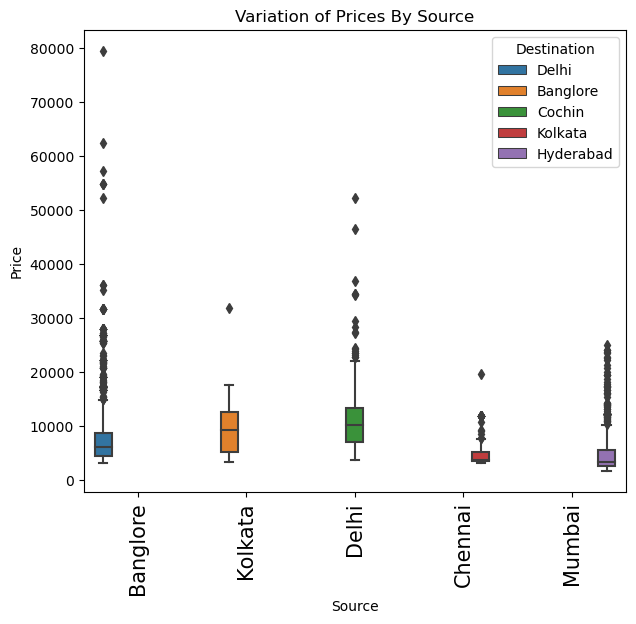

In [65]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Source',y='Price',hue='Destination',data=df)
plt.xticks(rotation=90,size=15)
plt.title('Variation of Prices By Source')
plt.show()

In [66]:
df['day_of_journey'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [67]:
df['month_of_journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [68]:
df['month_of_journey'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month_of_journey, dtype: int64

In [69]:
# peak business month

<Axes: xlabel='month_of_journey', ylabel='count'>

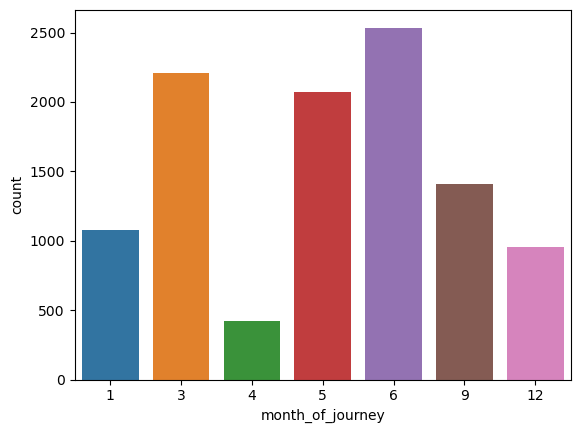

In [71]:
sns.countplot(x="month_of_journey",data=df)

In [72]:
df[df['Price']==df['Price'].max()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
2924,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,340.0,1,Business class,79512,3,1,5,45,11,25


In [73]:
df.groupby('month_of_journey')['Price'].sum().sort_values(ascending=False)

month_of_journey
6     23369151
5     19414875
3     18647220
9     13429373
1     11279591
12     8719011
4      2217885
Name: Price, dtype: int64

C:\Users\Madhu\AppData\Local\Temp\ipykernel_11128\2882254746.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month_of_journey",y="Price",ci=None,data=df,estimator=sum);


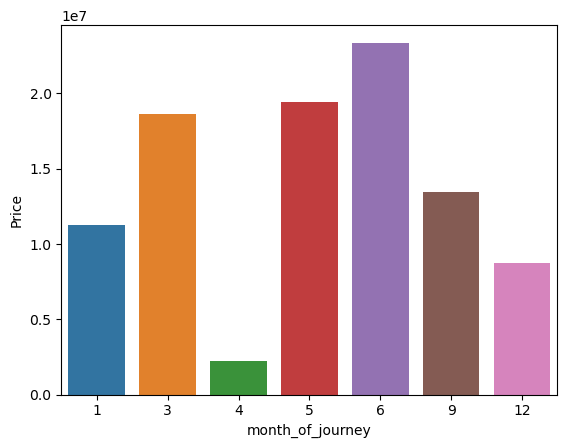

In [74]:
sns.barplot(x="month_of_journey",y="Price",ci=None,data=df,estimator=sum);

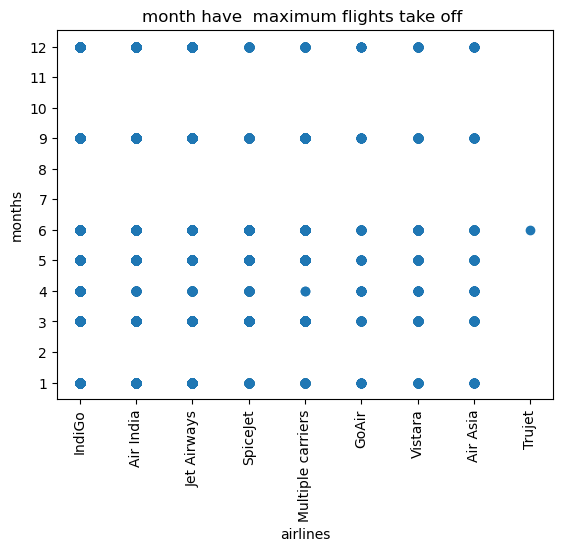

In [75]:
plt.scatter(df["Airline"],df["month_of_journey"])
plt.xticks(rotation=90);
plt.ylabel("months")
plt.xlabel("airlines")
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("month have  maximum flights take off ");

In [76]:
df.groupby(["month_of_journey"])["Airline"].value_counts()

month_of_journey  Airline          
1                 Jet Airways          434
                  Air India            197
                  IndiGo               184
                  SpiceJet              76
                  Multiple carriers     75
                  Vistara               60
                  Air Asia              28
                  GoAir                 21
3                 Jet Airways          675
                  IndiGo               513
                  Air India            369
                  Multiple carriers    274
                  SpiceJet             193
                  Vistara               85
                  Air Asia              59
                  GoAir                 43
4                 IndiGo               153
                  SpiceJet              76
                  Jet Airways           63
                  Air India             45
                  Air Asia              32
                  Vistara               31
                  

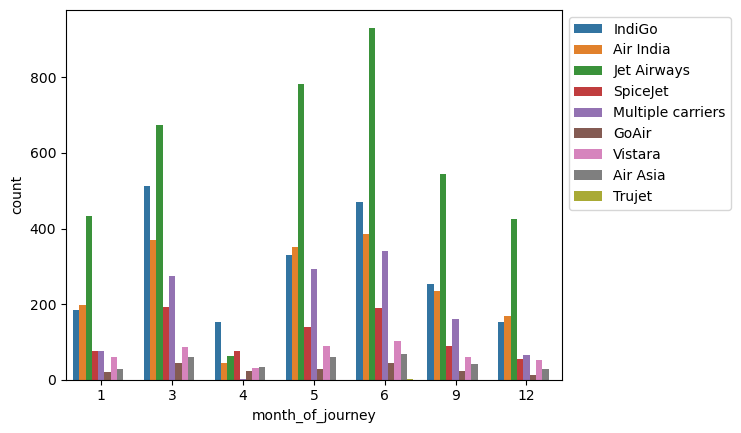

In [77]:
sns.countplot(x="month_of_journey",hue="Airline",data=df)
plt.legend(bbox_to_anchor= (1,1))

Text(0.5, 1.0, 'price varies  with month ')

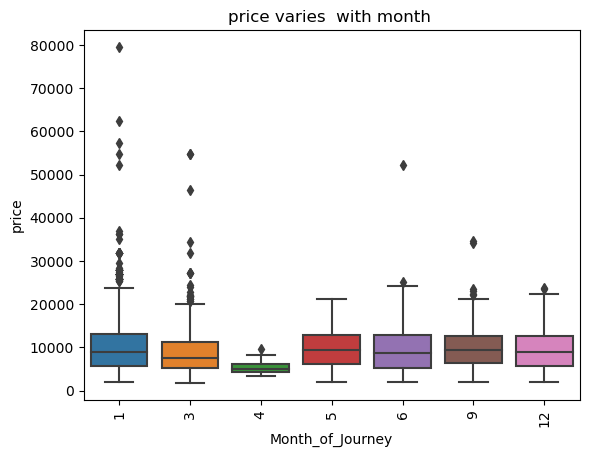

In [78]:
sns.boxplot(x="month_of_journey",y="Price",data=df)
plt.xticks(rotation=90);
plt.ylabel("price")
plt.xlabel("Month_of_Journey")
plt.title("price varies  with month ")

In [79]:
df["Dep_hour"].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

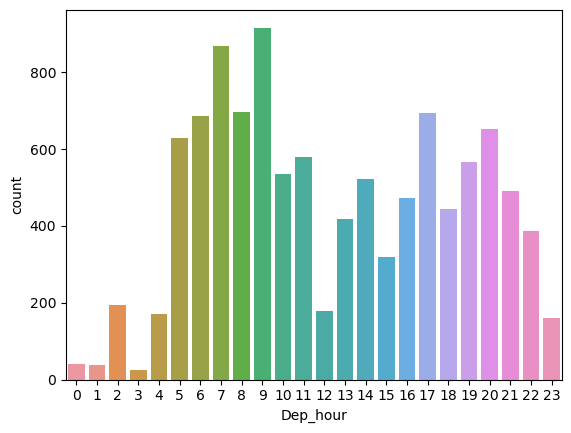

In [80]:
sns.countplot(x="Dep_hour",data=df);

In [81]:
df["arrival_hour"].value_counts()

19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      490
23     485
10     476
8      471
7      417
20     377
16     369
0      322
13     308
11     298
14     295
17     192
15     182
2       79
5       69
6       52
3       47
Name: arrival_hour, dtype: int64

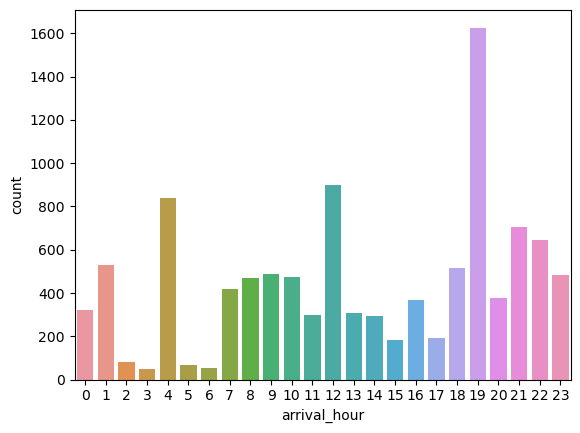

In [82]:
sns.countplot(x="arrival_hour",data=df);

In [85]:
pd.set_option('display.max_rows',None)  # to show the all rows

In [86]:
df.groupby(["Airline"])["Dep_hour"].value_counts()

Airline            Dep_hour
Air Asia           7            53
                   22           39
                   19           37
                   16           33
                   23           33
                   10           28
                   11           24
                   4            23
                   20           17
                   6            12
                   5             9
                   15            9
                   9             2
Air India          9           188
                   5           178
                   10          136
                   17          136
                   6           119
                   13          113
                   20          109
                   12          107
                   14           90
                   16           89
                   21           81
                   19           79
                   7            78
                   8            74
                   11      

In [87]:
df.groupby(["Airline"])["arrival_hour"].value_counts()

Airline            arrival_hour
Air Asia           22               63
                   7                52
                   13               36
                   2                33
                   1                30
                   12               30
                   23               24
                   10               21
                   19               11
                   8                 9
                   6                 5
                   15                5
Air India          19              390
                   23              192
                   7               160
                   9               143
                   8               133
                   16              100
                   13               89
                   12               69
                   20               66
                   21               63
                   11               53
                   22               52
                   5            

In [88]:
df.groupby(["Destination","Airline"])["arrival_hour"].value_counts()

Destination  Airline            arrival_hour
Banglore     Air Asia           22               34
                                1                30
                                12               30
                                23               24
                                10               21
                                19               11
             Air India          23               72
                                13               54
                                5                46
                                16               41
                                20               39
                                8                37
                                21               36
                                11               33
                                18               33
                                1                30
                                7                28
                                12               22
                   

In [89]:
x=df[['Duration','Price']]
x.corr()# sort of linear

,Duration,Price
Duration,1.000000,0.506743
Price,0.506743,1.000000


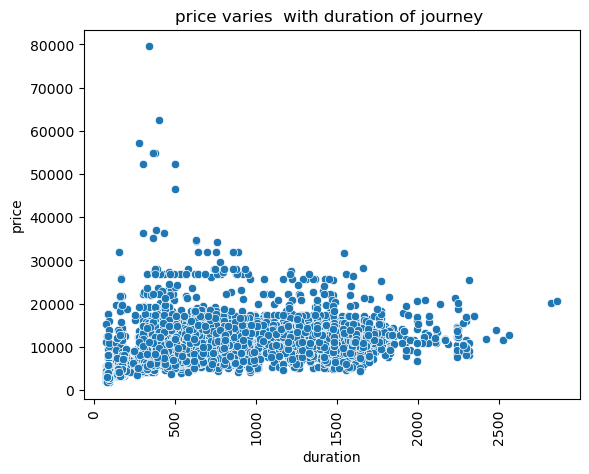

In [90]:
sns.scatterplot(x="Duration",y="Price",data=df)
plt.xticks(rotation=90);
plt.ylabel("price")
plt.xlabel("duration")
plt.title("price varies  with duration of journey ");

In [91]:
d=df.groupby(['month_of_journey','Airline'])['Price'].agg(['sum','count'])#.reset_index()
d

sum  count
month_of_journey Airline                           
1                Air Asia             179659     28
                 Air India           2198523    197
                 GoAir                145632     21
                 IndiGo              1123298    184
                 Jet Airways         5853653    434
                 Multiple carriers    900258     75
                 SpiceJet             372574     76
                 Vistara              505994     60
3                Air Asia             349853     59
                 Air India           3169391    369
                 GoAir                270160     43
                 IndiGo              3174457    513
                 Jet Airways         7087418    675
                 Multiple carriers   3054577    274
                 SpiceJet             844230    193
                 Vistara              697134     85
4                Air Asia             158440     32
                 Air India            259057     45
                 GoAir                114236     22
                 IndiGo               761519    153
                 Jet Airways          390139     63
                 Multiple carriers     12186      2
                 SpiceJet             343718     76
                 Vistara              178590     31
5                Air Asia             323056     61
                 Air India           3508354    352
                 GoAir                166097     28
                 IndiGo              1788186    329
                 Jet Airways         9435176    783
                 Multiple carriers   2922266    292
                 SpiceJet             568285    139
                 Vistara              703455     90
6                Air Asia             368888     69
                 Air India           3752045    386
                 GoAir                229346     45
                 IndiGo              2553771    469
                 Jet Airways        11100376    932
                 Multiple carriers   3803704    341
                 SpiceJet             757501    190
                 Trujet                 4140      1
                 Vistara              799380    103
9                Air Asia             263205     41
                 Air India           2295491    234
                 GoAir                146231     23
                 IndiGo              1504417    253
                 Jet Airways         6523683    544
                 Multiple carriers   1809841    160
                 SpiceJet             415805     90
                 Vistara              470700     61
12               Air Asia             140192     29
                 Air India           1655980    169
                 GoAir                 65343     12
                 IndiGo               742423    152
                 Jet Airways         4777168    424
                 Multiple carriers    685216     65
                 SpiceJet             246604     54
                 Vistara              406085     52

C:\Users\Madhu\AppData\Local\Temp\ipykernel_11128\987474247.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month_of_journey',y='Price',estimator='sum',hue='Airline',data=df,ci=None)


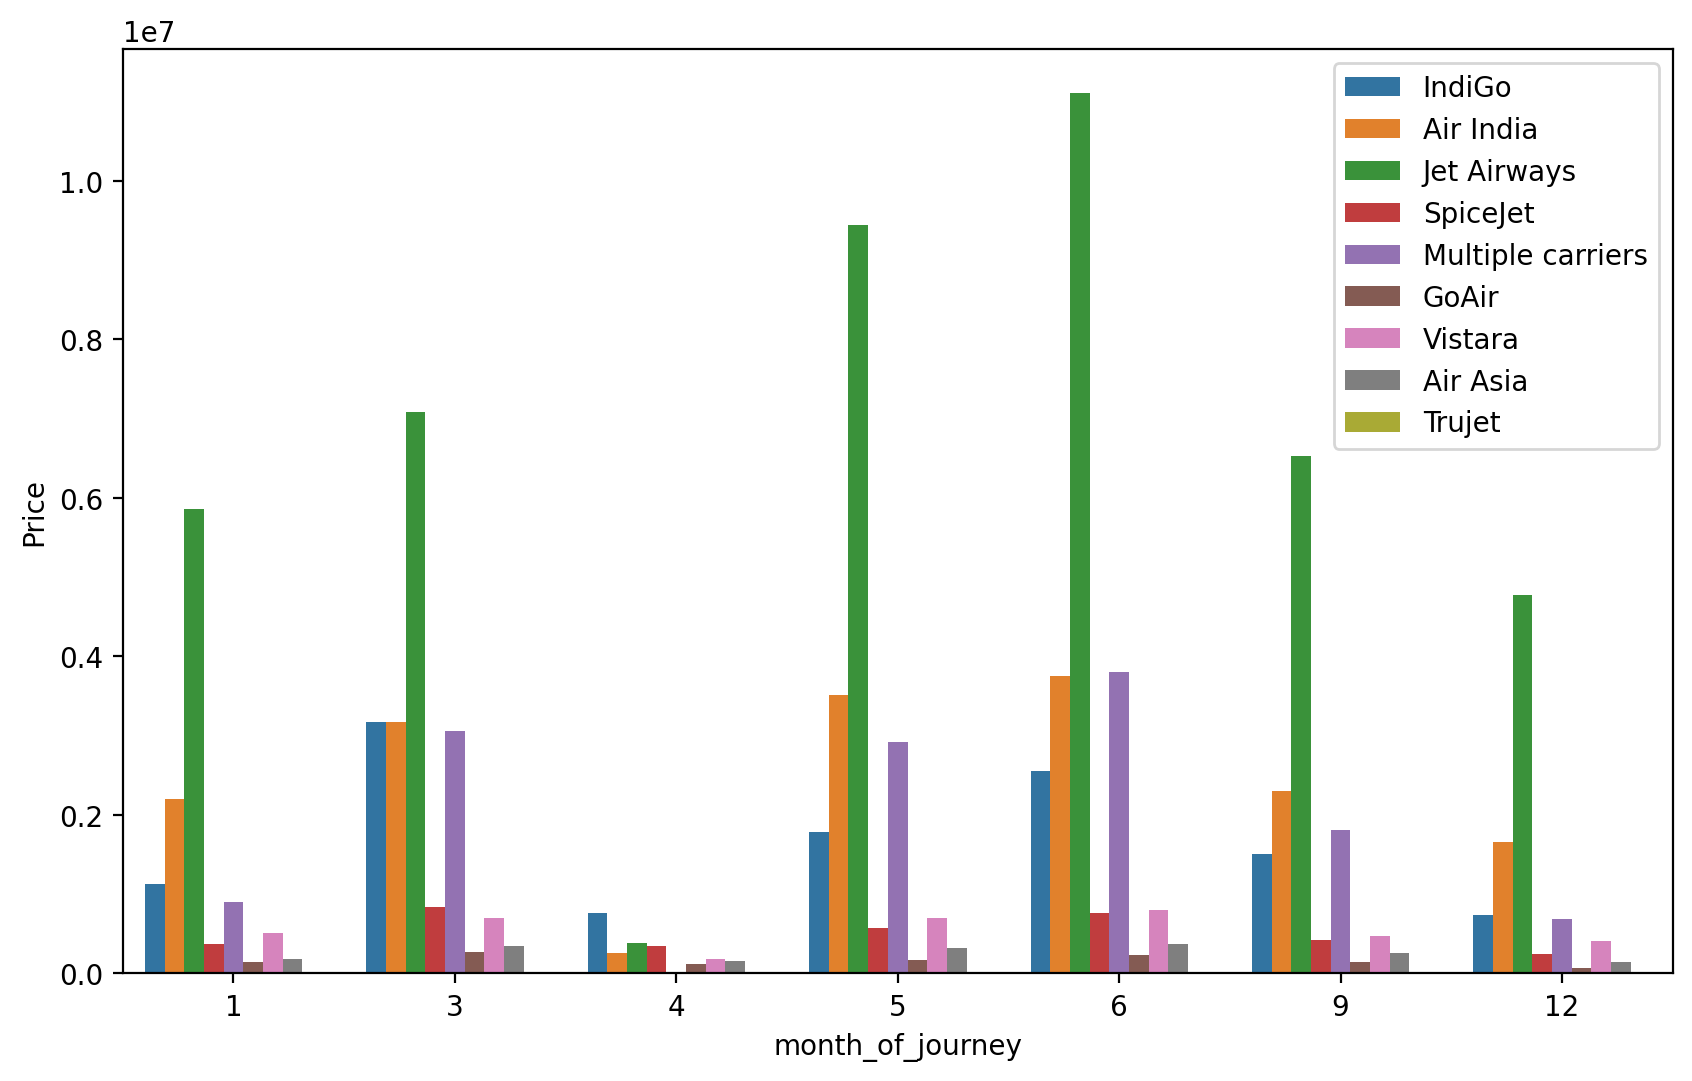

In [92]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x='month_of_journey',y='Price',estimator='sum',hue='Airline',data=df,ci=None)
plt.legend(bbox_to_anchor= (1,1));